<a href="https://colab.research.google.com/github/gomlfx/ApiaryFund/blob/master/autogluon_M1_next_day_graph_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install autogluon

In [2]:
#!pip install --upgrade mxnet

In [2]:
#designed for Jupyter/kaggle/colab
import pandas as pd
import numpy as np
#import matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline
#import normalization
from sklearn import preprocessing

#autogluon
from autogluon.tabular import TabularDataset, TabularPredictor  

In [3]:
 #MT4 csv 
df=pd.read_csv('EURUSD1.csv', names=['d','t','eu_o','eu_h','eu_l','eu_c','eu_v']) 

In [4]:
df=pd.DataFrame(data=df.tail(50000))
df

,d,t,eu_o,eu_h,eu_l,eu_c,eu_v
15448,2021.11.04,03:24,1.16148,1.16148,1.16147,1.16147,9
15449,2021.11.04,03:25,1.16147,1.16150,1.16147,1.16148,10
15450,2021.11.04,03:26,1.16150,1.16151,1.16147,1.16150,22
15451,2021.11.04,03:27,1.16149,1.16149,1.16144,1.16144,9
15452,2021.11.04,03:28,1.16144,1.16144,1.16140,1.16140,16
...,...,...,...,...,...,...,...
65443,2021.12.27,07:34,1.13166,1.13173,1.13166,1.13173,10
65444,2021.12.27,07:35,1.13171,1.13171,1.13161,1.13161,11
65445,2021.12.27,07:36,1.13161,1.13164,1.13160,1.13163,11
65446,2021.12.27,07:37,1.13163,1.13163,1.13163,1.13163,4


In [5]:
df = df.drop(['eu_o','eu_h','eu_l','eu_v'], axis=1)

In [6]:
pd.set_option('display.max_columns', 100)
df 


,d,t,eu_c
15448,2021.11.04,03:24,1.16147
15449,2021.11.04,03:25,1.16148
15450,2021.11.04,03:26,1.16150
15451,2021.11.04,03:27,1.16144
15452,2021.11.04,03:28,1.16140
...,...,...,...
65443,2021.12.27,07:34,1.13173
65444,2021.12.27,07:35,1.13161
65445,2021.12.27,07:36,1.13163
65446,2021.12.27,07:37,1.13163


In [7]:
df = df.drop(['d','t'], axis=1)

In [8]:
df20 = pd.DataFrame(data=df.iloc[-28800:-27360])
df20['row_num']=np.arange(len(df20))
df20.set_index('row_num',inplace=True)
df20 = df20.rename(columns={'eu_c':'day_20'})
print(df20)

df19 = pd.DataFrame(data=df.iloc[-27360:-25920])
df19['row_num']=np.arange(len(df19))
df19.set_index('row_num',inplace=True)
df19 = df19.rename(columns={'eu_c':'day_19'})
print(df19)

df18 = pd.DataFrame(data=df.iloc[-25920:-24480])
df18['row_num']=np.arange(len(df18))
df18.set_index('row_num',inplace=True)
df18 = df18.rename(columns={'eu_c':'day_18'})
print(df18)

df17 = pd.DataFrame(data=df.iloc[-24480:-23040])
df17['row_num']=np.arange(len(df17))
df17.set_index('row_num',inplace=True)
df17 = df17.rename(columns={'eu_c':'day_17'})
print(df17)

df16 = pd.DataFrame(data=df.iloc[-23040:-21600])
df16['row_num']=np.arange(len(df16))
df16.set_index('row_num',inplace=True)
df16 = df16.rename(columns={'eu_c':'day_16'})
print(df16)

df15 = pd.DataFrame(data=df.iloc[-21600:-20160])
df15['row_num']=np.arange(len(df15))
df15.set_index('row_num',inplace=True)
df15 = df15.rename(columns={'eu_c':'day_15'})
print(df15)

df14 = pd.DataFrame(data=df.iloc[-20160:-18720])
df14['row_num']=np.arange(len(df14))
df14.set_index('row_num',inplace=True)
df14 = df14.rename(columns={'eu_c':'day_14'})
print(df14)

df13 = pd.DataFrame(data=df.iloc[-18720:-17280])
df13['row_num']=np.arange(len(df13))
df13.set_index('row_num',inplace=True)
df13 = df13.rename(columns={'eu_c':'day_13'})
print(df13)

df12 = pd.DataFrame(data=df.iloc[-17280:-15840])
df12['row_num']=np.arange(len(df12))
df12.set_index('row_num',inplace=True)
df12 = df12.rename(columns={'eu_c':'day_12'})
print(df12)

df11 = pd.DataFrame(data=df.iloc[-15840:-14400])
df11['row_num']=np.arange(len(df11))
df11.set_index('row_num',inplace=True)
df11 = df11.rename(columns={'eu_c':'day_11'})
print(df11)

df10 = pd.DataFrame(data=df.iloc[-14400:-12960])
df10['row_num']=np.arange(len(df10))
df10.set_index('row_num',inplace=True)
df10 = df10.rename(columns={'eu_c':'day_10'})
print(df10)

df9 = pd.DataFrame(data=df.iloc[-12960:-11520])
df9['row_num']=np.arange(len(df9))
df9.set_index('row_num',inplace=True)
df9 = df9.rename(columns={'eu_c':'day_9'})
print(df9)

df8 = pd.DataFrame(data=df.iloc[-11520:-10080])
df8['row_num']=np.arange(len(df8))
df8.set_index('row_num',inplace=True)
df8 = df8.rename(columns={'eu_c':'day_8'})
print(df8)

df7 = pd.DataFrame(data=df.iloc[-10080:-8640])
df7['row_num']=np.arange(len(df7))
df7.set_index('row_num',inplace=True)
df7 = df7.rename(columns={'eu_c':'day_7'})
print(df7)

df6 = pd.DataFrame(data=df.iloc[-8640:-7200])
df6['row_num']=np.arange(len(df6))
df6.set_index('row_num',inplace=True)
df6 = df6.rename(columns={'eu_c':'day_6'})
print(df6)

df5 = pd.DataFrame(data=df.iloc[-7200:-5760])
df5['row_num']=np.arange(len(df5))
df5.set_index('row_num',inplace=True)
df5 = df5.rename(columns={'eu_c':'day_5'})
print(df5)

df4 = pd.DataFrame(data=df.iloc[-5760:-4320])
df4['row_num']=np.arange(len(df4))
df4.set_index('row_num',inplace=True)
df4 = df4.rename(columns={'eu_c':'day_4'})
print(df4)

df3 = pd.DataFrame(data=df.iloc[-4320:-2880])
df3['row_num']=np.arange(len(df3))
df3.set_index('row_num',inplace=True)
df3 = df3.rename(columns={'eu_c':'day_3'})
print(df3)

df2 = pd.DataFrame(data=df.iloc[-2880:-1440])
df2['row_num']=np.arange(len(df2))
df2.set_index('row_num',inplace=True)
df2 = df2.rename(columns={'eu_c':'day_2'})
print(df2)

df1 = pd.DataFrame(data=df.iloc[-1440:])
df1['row_num']=np.arange(len(df1))
df1.set_index('row_num',inplace=True)
df1 = df1.rename(columns={'eu_c':'day_1'})
print(df1)


          day_20
row_num         
0        1.12878
1        1.12874
2        1.12882
3        1.12881
4        1.12874
...          ...
1435     1.12927
1436     1.12930
1437     1.12925
1438     1.12923
1439     1.12925

[1440 rows x 1 columns]
          day_19
row_num         
0        1.12926
1        1.12930
2        1.12934
3        1.12935
4        1.12935
...          ...
1435     1.13246
1436     1.13259
1437     1.13254
1438     1.13238
1439     1.13236

[1440 rows x 1 columns]
          day_18
row_num         
0        1.13240
1        1.13203
2        1.13192
3        1.13195
4        1.13189
...          ...
1435     1.13270
1436     1.13275
1437     1.13280
1438     1.13280
1439     1.13265

[1440 rows x 1 columns]
          day_17
row_num         
0        1.13304
1        1.13302
2        1.13295
3        1.13299
4        1.13319
...          ...
1435     1.12981
1436     1.12977
1437     1.12969
1438     1.12959
1439     1.12954

[1440 rows x 1 columns]
          day_16

In [9]:
df_train = pd.concat([df20,df19,df18,df17,df16,df15,df14,df13,df12,df11,df10,df9,df8,df7,df6,df5,df4,df3,df2,df1], axis=1)
df_train = pd.DataFrame(data=df_train)
df_train


,day_20,day_19,day_18,day_17,day_16,day_15,day_14,day_13,day_12,day_11,day_10,day_9,day_8,day_7,day_6,day_5,day_4,day_3,day_2,day_1
row_num,,,,,,,,,,,,,,,,,,,,
0,1.12878,1.12926,1.13240,1.13304,1.12949,1.12952,1.12902,1.12902,1.13325,1.12980,1.12963,1.12781,1.12578,1.12864,1.13288,1.12480,1.12796,1.12720,1.13392,1.13327
1,1.12874,1.12930,1.13203,1.13302,1.12949,1.12949,1.12911,1.12898,1.13316,1.12986,1.12964,1.12780,1.12591,1.12859,1.13283,1.12480,1.12796,1.12719,1.13392,1.13327
2,1.12882,1.12934,1.13192,1.13295,1.12959,1.12941,1.12919,1.12901,1.13313,1.12984,1.12968,1.12761,1.12595,1.12855,1.13283,1.12476,1.12795,1.12720,1.13399,1.13324
3,1.12881,1.12935,1.13195,1.13299,1.12966,1.12946,1.12919,1.12897,1.13312,1.12985,1.12964,1.12760,1.12595,1.12852,1.13283,1.12471,1.12789,1.12721,1.13399,1.13326
4,1.12874,1.12935,1.13189,1.13319,1.12955,1.12949,1.12914,1.12908,1.13309,1.12985,1.12968,1.12760,1.12596,1.12853,1.13286,1.12471,1.12788,1.12721,1.13399,1.13325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1.12927,1.13246,1.13270,1.12981,1.12930,1.12901,1.12887,1.13340,1.12993,1.12963,1.12778,1.12587,1.12867,1.13297,1.12491,1.12791,1.12715,1.13392,1.13326,1.13173
1436,1.12930,1.13259,1.13275,1.12977,1.12930,1.12897,1.12891,1.13335,1.12985,1.12963,1.12793,1.12584,1.12858,1.13297,1.12486,1.12797,1.12714,1.13391,1.13324,1.13161
1437,1.12925,1.13254,1.13280,1.12969,1.12952,1.12900,1.12896,1.13340,1.12984,1.12969,1.12785,1.12586,1.12854,1.13292,1.12492,1.12795,1.12717,1.13391,1.13325,1.13163


In [10]:
df_test = pd.concat([df19,df18,df17,df16,df15,df14,df13,df12,df11,df10,df9,df8,df7,df6,df5,df4,df3,df2,df1], axis=1)
df_test['pred_col'] =0
df_test.rename(columns={'day_19':'day_20','day_18':'day_19','day_17':'day_18','day_16':'day_17','day_15':'day_16','day_14':'day_15','day_13':'day_14','day_12':'day_13','day_11':'day_12','day_10':'day_11','day_9':'day_10','day_8':'day_9','day_7':'day_8','day_6':'day_7','day_5':'day_6','day_4':'day_5','day_3': 'day_4', 'day_2': 'day_3','day_1':'day_2','pred_col':'day_1'}, inplace=True)
df_test = pd.DataFrame(data=df_test)
df_test

,day_20,day_19,day_18,day_17,day_16,day_15,day_14,day_13,day_12,day_11,day_10,day_9,day_8,day_7,day_6,day_5,day_4,day_3,day_2,day_1
row_num,,,,,,,,,,,,,,,,,,,,
0,1.12926,1.13240,1.13304,1.12949,1.12952,1.12902,1.12902,1.13325,1.12980,1.12963,1.12781,1.12578,1.12864,1.13288,1.12480,1.12796,1.12720,1.13392,1.13327,0
1,1.12930,1.13203,1.13302,1.12949,1.12949,1.12911,1.12898,1.13316,1.12986,1.12964,1.12780,1.12591,1.12859,1.13283,1.12480,1.12796,1.12719,1.13392,1.13327,0
2,1.12934,1.13192,1.13295,1.12959,1.12941,1.12919,1.12901,1.13313,1.12984,1.12968,1.12761,1.12595,1.12855,1.13283,1.12476,1.12795,1.12720,1.13399,1.13324,0
3,1.12935,1.13195,1.13299,1.12966,1.12946,1.12919,1.12897,1.13312,1.12985,1.12964,1.12760,1.12595,1.12852,1.13283,1.12471,1.12789,1.12721,1.13399,1.13326,0
4,1.12935,1.13189,1.13319,1.12955,1.12949,1.12914,1.12908,1.13309,1.12985,1.12968,1.12760,1.12596,1.12853,1.13286,1.12471,1.12788,1.12721,1.13399,1.13325,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1.13246,1.13270,1.12981,1.12930,1.12901,1.12887,1.13340,1.12993,1.12963,1.12778,1.12587,1.12867,1.13297,1.12491,1.12791,1.12715,1.13392,1.13326,1.13173,0
1436,1.13259,1.13275,1.12977,1.12930,1.12897,1.12891,1.13335,1.12985,1.12963,1.12793,1.12584,1.12858,1.13297,1.12486,1.12797,1.12714,1.13391,1.13324,1.13161,0
1437,1.13254,1.13280,1.12969,1.12952,1.12900,1.12896,1.13340,1.12984,1.12969,1.12785,1.12586,1.12854,1.13292,1.12492,1.12795,1.12717,1.13391,1.13325,1.13163,0


In [11]:
#predict new interval
label_new_interval = 'day_1' 
print("Summary of class variable: \n", df_train[label_new_interval].describe())

Summary of class variable: 
 count    1440.000000
mean        1.132228
std         0.000932
min         1.130300
25%         1.131650
50%         1.132030
75%         1.132940
max         1.134290
Name: day_1, dtype: float64


In [12]:
#predict new interval
save_path='agModels-predict_day1'
predictor = TabularPredictor(label=label_new_interval, path=save_path)
predictor.fit(df_train)#, presets='best_quality')
#.fit(presets='best_quality) is slower

Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predict_day1/"
AutoGluon Version:  0.3.1
Train Data Rows:    1440
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (1.13429, 1.1303, 1.13223, 0.00093)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12072.61 MB
	Train Data (Original)  Memory Usage: 0.22 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	S

[1000]	train_set's rmse: 5.26867e-05	valid_set's rmse: 0.000120529
[2000]	train_set's rmse: 3.36371e-05	valid_set's rmse: 0.000115523
[3000]	train_set's rmse: 2.38276e-05	valid_set's rmse: 0.00011428
[4000]	train_set's rmse: 1.76473e-05	valid_set's rmse: 0.000113514
[5000]	train_set's rmse: 1.33128e-05	valid_set's rmse: 0.000113147
[6000]	train_set's rmse: 1.03546e-05	valid_set's rmse: 0.000112774
[7000]	train_set's rmse: 8.15806e-06	valid_set's rmse: 0.000112712
[8000]	train_set's rmse: 6.47793e-06	valid_set's rmse: 0.000112589
[9000]	train_set's rmse: 5.17425e-06	valid_set's rmse: 0.000112514
[10000]	train_set's rmse: 4.15931e-06	valid_set's rmse: 0.000112443


	-0.0001	 = Validation score   (root_mean_squared_error)
	10.59s	 = Training   runtime
	0.45s	 = Validation runtime
Fitting model: LightGBM ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 6.69164e-06	valid_set's rmse: 0.000119554
[2000]	train_set's rmse: 1.39173e-06	valid_set's rmse: 0.000119166
[3000]	train_set's rmse: 3.17934e-07	valid_set's rmse: 0.00011912
[4000]	train_set's rmse: 8.30577e-08	valid_set's rmse: 0.000119115
[5000]	train_set's rmse: 2.42457e-08	valid_set's rmse: 0.000119114


	-0.0001	 = Validation score   (root_mean_squared_error)
	12.05s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.0001	 = Validation score   (root_mean_squared_error)
	3.07s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: CatBoost ...
	-0.0001	 = Validation score   (root_mean_squared_error)
	38.49s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.0001	 = Validation score   (root_mean_squared_error)
	1.25s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.0002	 = Validation score   (root_mean_squared_error)
	2.91s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-0.0002	 = Validation score   (root_mean_squared_error)
	0.28s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetMXNet ...
	-0.0001	 = Validation score   (root_mean_squared_error)
	17.45s	 = Training   runtime
	0.15s	 = Validation runtime
Fitt

In [13]:
#contrast leaderboard result of train and test data
predictor.leaderboard(df_train, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.000045,-0.000101,3.904810,0.930331,44.187836,0.010537,0.000579,0.347734,2,True,12
1,KNeighborsDist,-0.000046,-0.000103,0.153066,0.111916,0.010862,0.153066,0.111916,0.010862,1,True,2
2,LightGBMXT,-0.000050,-0.000112,2.302966,0.448990,10.589154,2.302966,0.448990,10.589154,1,True,3
3,CatBoost,-0.000051,-0.000114,0.019185,0.004652,38.486644,0.019185,0.004652,38.486644,1,True,6
4,LightGBM,-0.000053,-0.000119,1.090410,0.199717,12.049350,1.090410,0.199717,12.049350,1,True,4
5,LightGBMLarge,-0.000058,-0.000130,0.113519,0.018635,3.738370,0.113519,0.018635,3.738370,1,True,11
6,ExtraTreesMSE,-0.000061,-0.000115,0.136192,0.103075,1.251094,0.136192,0.103075,1.251094,1,True,7
7,RandomForestMSE,-0.000069,-0.000125,0.140803,0.103028,3.070868,0.140803,0.103028,3.070868,1,True,5
8,KNeighborsUnif,-0.000085,-0.000107,0.148463,0.111690,0.028609,0.148463,0.111690,0.028609,1,True,1
9,NeuralNetMXNet,-0.000100,-0.000121,0.234312,0.150494,17.452366,0.234312,0.150494,17.452366,1,True,10


In [ ]:
predictor.feature_importance(data=df_train)

Computing feature importance via permutation shuffling for 19 features using 1000 rows with 3 shuffle sets...
	187.98s	= Expected runtime (62.66s per shuffle set)


In [16]:
#predict close
test_data = TabularDataset(df_test)
y_test = df_test[label_new_interval]
test_data_nolab = df_test.drop(columns=[label_new_interval])
test_data_nolab 

,day_7,day_6,day_5,day_4,day_3,day_2
row_num,,,,,,
0,1.13288,1.12480,1.12796,1.12720,1.13392,1.13327
1,1.13283,1.12480,1.12796,1.12719,1.13392,1.13327
2,1.13283,1.12476,1.12795,1.12720,1.13399,1.13324
3,1.13283,1.12471,1.12789,1.12721,1.13399,1.13326
4,1.13286,1.12471,1.12788,1.12721,1.13399,1.13325
...,...,...,...,...,...,...
1435,1.12491,1.12791,1.12715,1.13392,1.13326,1.13173
1436,1.12486,1.12797,1.12714,1.13391,1.13324,1.13161
1437,1.12492,1.12795,1.12717,1.13391,1.13325,1.13163


In [17]:
#predict new interval
predictor = TabularPredictor.load(save_path)
y_pred = predictor.predict(test_data_nolab)
print("Predictions: \n", y_pred)
perf = predictor.evaluate_predictions(y_true = y_test, y_pred = y_pred, auxiliary_metrics=True)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
Evaluation: root_mean_squared_error on test data: -1.131782783262616
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -1.131782783262616,
    "mean_squared_error": -1.2809322684896798,
    "mean_absolute_error": -1.1317826932503117,
    "r2": 0.0,
    "pearsonr": NaN,
    "median_absolute_error": -1.132004737854004
}


Predictions: 
 row_num
0       1.131658
1       1.131663
2       1.131672
3       1.131706
4       1.131688
          ...   
1435    1.132142
1436    1.132143
1437    1.132130
1438    1.132125
1439    1.132130
Name: day_1, Length: 1440, dtype: float32


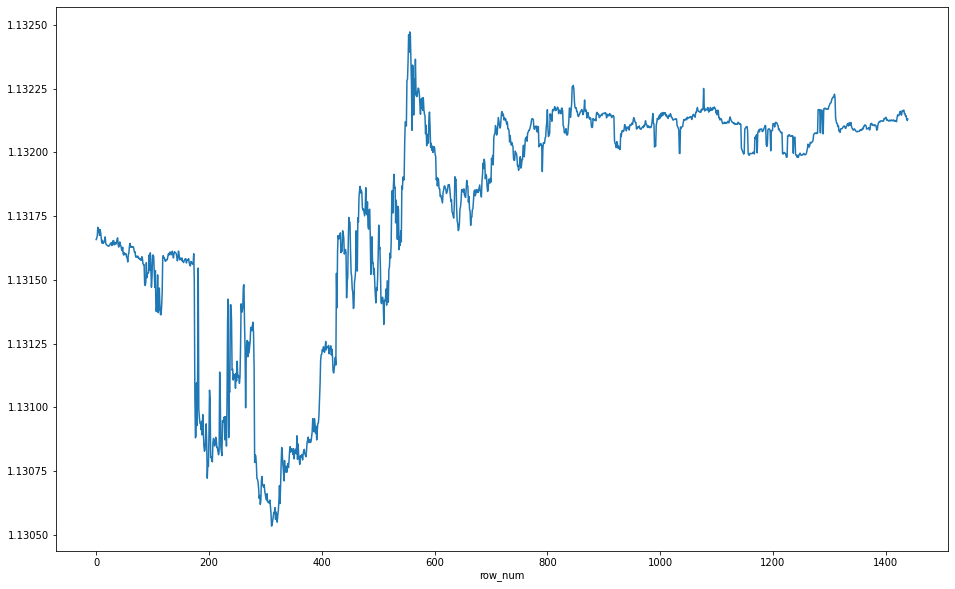

In [18]:
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120

ax = y_pred.plot(figsize = (16, 10)) 